# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-07 10:32:53.137910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


169001437/169001437 [==============================] - 28s 0us/step


Text(0.5, 1.0, 'x_train[0]')

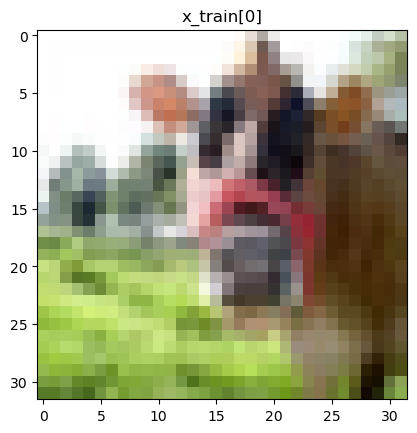

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread

plt.imshow(x_train[0])
plt.title('x_train[0]')

In [18]:
y_train[0][0]

19

In [15]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [29]:
print(f'x_train shape: {x_train.shape} y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape} y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3) y_test shape: (10000, 100)


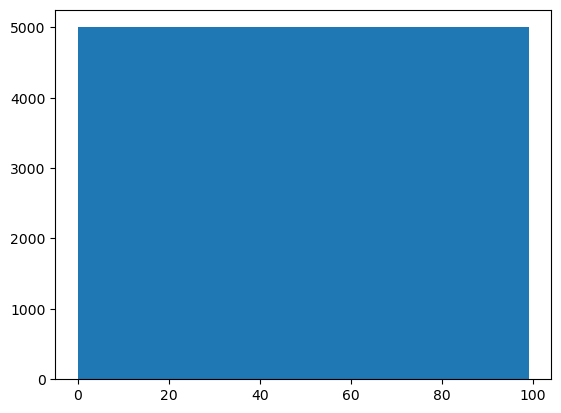

In [23]:
plot = plt.hist(y_train)
#confirm uniform distribution of training data and range of classes


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [24]:
from keras.layers import Rescaling
x_train = Rescaling(1./255)(x_train)
x_test = Rescaling(1./255)(x_test)

In [25]:
x_train[1]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[1.       , 1.       , 1.       ],
        [0.9921569, 0.9921569, 0.9921569],
        [0.9921569, 0.9921569, 0.9921569],
        ...,
        [0.9921569, 0.9921569, 0.9921569],
        [0.9921569, 0.9921569, 0.9921569],
        [1.       , 1.       , 1.       ]],

       [[1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        ...,
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ]],

       [[1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        ...,
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ]],

       ...,

       [[1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       

In [26]:
from keras.layers import CategoryEncoding
y_train = CategoryEncoding(output_mode='one_hot',num_tokens=100)(y_train)
y_test = CategoryEncoding(output_mode='one_hot',num_tokens=100)(y_test)

In [27]:
y_train[0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

> (x_train,y_train) and (x_test,y_test) were split for validation on import => not interested in reducing training data further for validation which could introduce loss

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [36]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential(
    [Conv2D(
        filters=128,
        kernel_size=(4, 4),
        padding="same",
        activation='relu',
        input_shape=(32, 32, 3),),
     MaxPooling2D(),
     Flatten(),
     Dense(100,activation='softmax'),
     ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       6272      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 100)               3276900   
                                                                 
Total params: 3283172 (12.52 MB)
Trainable params: 3283172 (12.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [37]:
from keras import optimizers

from keras import optimizers
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [38]:
history = model.fit(
    x_train,
    y_train,
    epochs=10, # chose 25 and found accuracy 30 loss 9.19 which exceeded every step here
    batch_size=32,
)

loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss (categorical_crossentropy):     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/10


1563/1563 [==============================] - 122s 77ms/step - loss: 3.4360 - accuracy: 0.2080
Epoch 2/10
1563/1563 [==============================] - 160s 102ms/step - loss: 2.6729 - accuracy: 0.3513
Epoch 3/10
1563/1563 [==============================] - 138s 88ms/step - loss: 2.2531 - accuracy: 0.4408
Epoch 4/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.8674 - accuracy: 0.5250
Epoch 5/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5135 - accuracy: 0.6090
Epoch 6/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.2038 - accuracy: 0.6879
Epoch 7/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.9524 - accuracy: 0.7508
Epoch 8/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.7463 - accuracy: 0.8051
Epoch 9/10
1563/1563 [==============================] - 148s 94ms/step - loss: 0.5760 - accuracy: 0.8530
Epoch 10/10
313/313 [==============================] - 8s 25ms/st

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

* Accuracy: 31.57
* Loss categorical cross-entropy: 4.89
* Reason for categorical cross-entropy: the context of this task is classifying categorical labels with using a neural network that has softmax activation which satisfies the prerequisites of the chosen metric. In general the metric chosen reduces the impact of outliers. The metric has properties that make it useful for gradient descent.
* interpretation: Lower is better, really looking for a loss of 1 or less, had a loss of 9+, we should try a deeper pipeline to learn with to improve these results.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

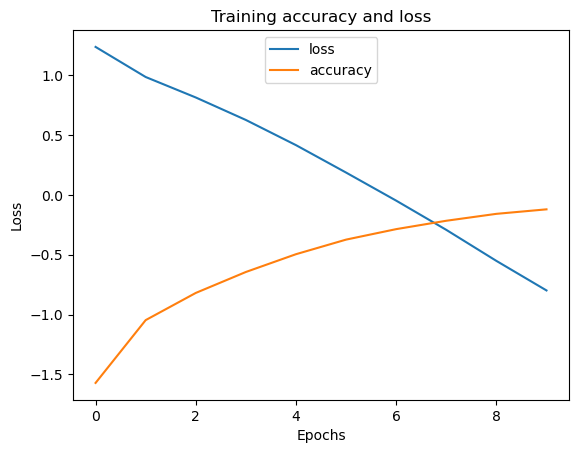

In [45]:
# reference: github.com/Uoft-DSI/deep_learning/01_materials/labs/lab5.ipynb
import matplotlib.pyplot as plt
plt.plot(np.log(history.history["loss"]), label="loss")
plt.plot(np.log(history.history["accuracy"]), label="accuracy")
plt.legend(loc="upper center")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training accuracy and loss")
plt.show()

We observe see that the accuracy rose and the loss fell throughout the training indicating the model's learning. However inspecting the discrepancy between training metrics and validation metrics as follows

Training
* Accuracy: .8857
* Loss: 0.4501

Validation
* Accuracy:.3157
* Loss: 4.89

We find that the actual performance of the model is far below the performance represented by training metrics. When this happens it is a sign that our model is over-fitting the data.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [78]:
# inspiration from CIFAR benchmarks, citing the DenseNet paper: https://arxiv.org/abs/1608.06993
# a Keras implementation @  https://github.com/tdeboissiere/DeepLearningImplementations/tree/master/DenseNet
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, AveragePooling2D, GlobalAveragePooling2D, Input, Concatenate, BatchNormalization
from keras.regularizers import l2
import keras.backend as K

# if K.common.image_dim_ordering() == "th":
#     concat_axis = 1
# elif K.common.image_dim_ordering() == "tf":
#     concat_axis = -1
concat_axis = -1

#Initialize densenet
nb_filter = 16
growth_rate = 12
img_dim = x_train.shape[1:]
model_input = Input(shape=img_dim)
x = Conv2D(filters=16,
           kernel_size=(3, 3),
           kernel_initializer="he_uniform",
           padding="same",
           name="initial_conv2D",
           use_bias=False,
           kernel_regularizer=l2(1E-4))(model_input)
###
#1st Dense Block
###
x = BatchNormalization(axis=concat_axis,
                        gamma_regularizer=l2(1E-4),
                        beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = Conv2D(nb_filter, (3, 3),
            kernel_initializer="he_uniform",
            padding="same",
            use_bias=False,
            kernel_regularizer=l2(1E-4))(x)
x = Dropout(0.2)(x)
nb_filter += growth_rate
###
#1st Transition
###
x = BatchNormalization(axis=concat_axis,
                           gamma_regularizer=l2(1E-4),
                           beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = Conv2D(16, (1, 1),
            kernel_initializer="he_uniform",
            padding="same",
            use_bias=False,
            kernel_regularizer=l2(1E-4))(x)

x = Dropout(0.2)(x)
x = AveragePooling2D((2, 2), strides=(2, 2))(x)
###
#2nd Dense Block
###
x = BatchNormalization(axis=concat_axis,
                        gamma_regularizer=l2(1E-4),
                        beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = Conv2D(nb_filter, (3, 3),
            kernel_initializer="he_uniform",
            padding="same",
            use_bias=False,
            kernel_regularizer=l2(1E-4))(x)
x = Dropout(0.2)(x)
nb_filter += growth_rate
###
#2nd Transition
x = BatchNormalization(axis=concat_axis,
                           gamma_regularizer=l2(1E-4),
                           beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = Conv2D(16, (1, 1),
            kernel_initializer="he_uniform",
            padding="same",
            use_bias=False,
            kernel_regularizer=l2(1E-4))(x)

x = Dropout(0.2)(x)
x = AveragePooling2D((2, 2), strides=(2, 2))(x)
###
###
#3rd Dense Block
###
x = BatchNormalization(axis=concat_axis,
                        gamma_regularizer=l2(1E-4),
                        beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = Conv2D(nb_filter, (3, 3),
            kernel_initializer="he_uniform",
            padding="same",
            use_bias=False,
            kernel_regularizer=l2(1E-4))(x)
x = Dropout(0.2)(x)
nb_filter += growth_rate
###
#3rd Transition
###
x = BatchNormalization(axis=concat_axis,
                           gamma_regularizer=l2(1E-4),
                           beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = Conv2D(16, (1, 1),
            kernel_initializer="he_uniform",
            padding="same",
            use_bias=False,
            kernel_regularizer=l2(1E-4))(x)

x = Dropout(0.2)(x)
x = AveragePooling2D((2, 2), strides=(2, 2))(x)
###
#4th Dense Block
###
x = BatchNormalization(axis=concat_axis,
                        gamma_regularizer=l2(1E-4),
                        beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = Conv2D(nb_filter, (3, 3),
            kernel_initializer="he_uniform",
            padding="same",
            use_bias=False,
            kernel_regularizer=l2(1E-4))(x)
x = Dropout(0.2)(x)
nb_filter += growth_rate
###
#Classify
###
x = BatchNormalization(axis=concat_axis,
                           gamma_regularizer=l2(1E-4),
                           beta_regularizer=l2(1E-4))(x)
x = Activation('relu')(x)
x = GlobalAveragePooling2D(data_format=K.image_data_format())(x)
x = Dense(100,
            activation='softmax',
            kernel_regularizer=l2(1E-4),
            bias_regularizer=l2(1E-4))(x) #100 image classes

model = Model(inputs=[model_input], outputs=[x], name="DenseNet")
model.summary()

Model: "DenseNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 initial_conv2D (Conv2D)     (None, 32, 32, 16)        432       
                                                                 
 batch_normalization_28 (Ba  (None, 32, 32, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_28 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        2304      
                                                                 
 dropout_22 (Dropout)        (None, 32, 32, 16)        0         
                                                          

In [79]:
from keras.optimizers import Adam
opt = Adam(learning_rate=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=["accuracy"])

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [81]:
history = model.fit(
    x_train,
    y_train,
    epochs=150,
    batch_size=1024,
)


Epoch 1/150
49/49 [==============================] - 116s 2s/step - loss: 3.8424 - accuracy: 0.1156
Epoch 2/150
49/49 [==============================] - 103s 2s/step - loss: 3.7388 - accuracy: 0.1305
Epoch 3/150
49/49 [==============================] - 102s 2s/step - loss: 3.6642 - accuracy: 0.1420
Epoch 4/150
49/49 [==============================] - 101s 2s/step - loss: 3.5971 - accuracy: 0.1503
Epoch 5/150
49/49 [==============================] - 101s 2s/step - loss: 3.5435 - accuracy: 0.1589
Epoch 6/150
49/49 [==============================] - 101s 2s/step - loss: 3.4880 - accuracy: 0.1683
Epoch 7/150
49/49 [==============================] - 107s 2s/step - loss: 3.4356 - accuracy: 0.1773
Epoch 8/150
49/49 [==============================] - 108s 2s/step - loss: 3.3867 - accuracy: 0.1863
Epoch 9/150
49/49 [==============================] - 106s 2s/step - loss: 3.3290 - accuracy: 0.1964
Epoch 10/150
49/49 [==============================] - 107s 2s/step - loss: 3.2887 - accuracy: 0.2018

In [82]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss (categorical_crossentropy):     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 [==============================] - 11s 31ms/step - loss: 2.5732 - accuracy: 0.3727
Loss (categorical_crossentropy):     2.57
Accuracy: 37.27%


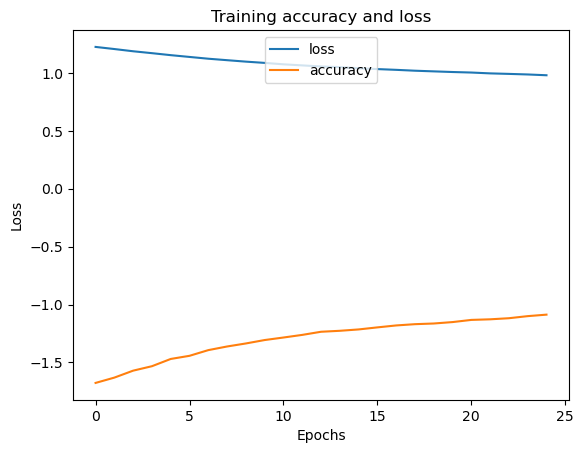

In [ ]:
# reference: github.com/Uoft-DSI/deep_learning/01_materials/labs/lab5.ipynb
import matplotlib.pyplot as plt
plt.plot(np.log(history.history["loss"]), label="loss")
plt.plot(np.log(history.history["accuracy"]), label="accuracy")
plt.legend(loc="upper center")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training accuracy and loss")
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

> A Dense Net with 2 dense layers did not improve the performance of the model remaining at roughly 30% accuracy. A deeper model with 5 dense layers increased accuracy up to 37%.
>
> Training improved by increasing batch sizes from 64 up to 256 and negligibly improved when batch sizes were increased up to 1024. In general when batches were less than the number of classes then training improved accuracy inconsistently and reversed improvements frequently. When batch sizes were double the number of classes or more then training proceeded as expected and asymptotically slowed down near 30%
>
> Another happy improvement was a decrease in the rate of divergence between validation accuracy and training accuracy. This reduction indicated less overfitting per epoch and hence improved the validation accuracy. These effects came from using regularization and drop-out.
>
> I was hoping to reach 50% validation accuracy from the model architecture alone. However, I think the CIFAR-100 data set is too small alone to learn the convolution layers needed to analyze images let alone form these 100 classes.
>
> The next approach to try to improve model performance will be data augmentation. Introducing copies of the data with 0-30 degree rotations and 5-20% crops could help solve the insufficiency of training data.
>
> An alternative or supplement to data augmentation would be to specialize a pre-trained model. Specifically a model that has been trained on ImageNet (millions of images) would have high quality convolution filters to begin with. Ignoring those pre-trained weights but adding layers to then be trained on the CIFAR-100 data + augmented data to specialize the models classification to CIFAR 100's classes

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.